In [ ]:
#analisis ini berutujuan untuk memprediksi harga rumah menggunakan algoritma random forest

# ***Perisapan Data***

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
#membaca file csv
data = pd.read_csv('/content/jabodetabek_house_price.csv')

#menampilkan 5 baris pertama
data.head()

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


In [134]:
#informasi umum data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

In [135]:
data.describe()

,price_in_rp,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,garages
count,3.553000e+03,3553.000000,3553.000000,3519.000000,3524.000000,3551.000000,3551.000000,3553.000000,3553.000000,3553.000000,3547.000000,2108.000000,2108.000000,3553.000000
mean,4.191685e+09,-6.324721,106.792881,3.326513,2.624858,204.806815,186.587440,1.197861,0.496482,0.370391,1.764590,3.880930,2018.137097,0.708978
std,1.375067e+10,0.129245,0.172159,2.672148,2.696497,402.127746,248.443471,1.114996,0.685723,0.536024,0.637349,7.603708,7.641448,1.311879
min,4.200000e+07,-6.894828,106.402315,1.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1870.000000,0.000000
25%,8.000000e+08,-6.397933,106.687295,2.000000,2.000000,75.000000,65.500000,1.000000,0.000000,0.000000,1.000000,0.000000,2016.000000,0.000000
50%,1.500000e+09,-6.300733,106.799954,3.000000,2.000000,108.000000,112.000000,1.000000,0.000000,0.000000,2.000000,1.000000,2021.000000,0.000000
75%,3.590000e+09,-6.231754,106.874766,4.000000,3.000000,192.000000,208.000000,2.000000,1.000000,1.000000,2.000000,6.000000,2022.000000,1.000000
max,5.800000e+11,-6.102478,109.771691,99.000000,99.000000,8000.000000,6000.000000,15.000000,7.000000,5.000000,5.000000,152.000000,2052.000000,50.000000


In [136]:
#mengecek missing value atau nilai yang hilang
data.isnull().sum()

,0
url,0
price_in_rp,0
title,0
address,0
district,0
city,0
lat,0
long,0
facilities,0
property_type,1


# ***Pembersihan Data***

In [137]:
#hapus kolom yang tidak relevan
data = data.drop(['url', 'title', 'ads_id', 'lat', 'long', ], axis=1)

data.head()

,price_in_rp,address,district,city,facilities,property_type,bedrooms,bathrooms,land_size_m2,building_size_m2,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,2.990000e+09,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,4.0,4.0,239.0,272.0,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,1.270000e+09,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,Taman,rumah,3.0,2.0,55.0,69.0,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,1.950000e+09,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,3.0,3.0,119.0,131.0,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,3.300000e+09,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,3.0,3.0,180.0,174.0,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,4.500000e+09,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,4.0,3.0,328.0,196.0,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


In [138]:
#mengisi missing values untuk kolom numerik
numeric_columns = ['bedrooms', 'bathrooms', 'land_size_m2', 'building_size_m2', 'price_in_rp']
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Menampilkan jumlah missing values setelah diisi
data[numeric_columns].isnull().sum()

,0
bedrooms,0
bathrooms,0
land_size_m2,0
building_size_m2,0
price_in_rp,0


In [139]:
# Menhapus kolom dengan banyak missing value
columns_with_high_missing = ['building_age', 'year_built', 'building_orientation']
data = data.drop(columns=columns_with_high_missing, errors='ignore')

# Menampilkan kolom yang tersisa
data.columns


Index(['price_in_rp', 'address', 'district', 'city', 'facilities',
       'property_type', 'bedrooms', 'bathrooms', 'land_size_m2',
       'building_size_m2', 'carports', 'certificate', 'electricity',
       'maid_bedrooms', 'maid_bathrooms', 'floors', 'property_condition',
       'garages', 'furnishing'],
      dtype='object')

In [140]:
#Mengecek missing values yang tersisa
data.isnull().sum()

,0
price_in_rp,0
address,0
district,0
city,0
facilities,0
property_type,1
bedrooms,0
bathrooms,0
land_size_m2,0
building_size_m2,0


In [141]:
# Mengimputasi missing values dengan mode (nilai terbanyak) pada 3 kolom sekaligus
for col in ['certificate', 'property_condition', 'furnishing', 'floors', 'property_type']:
    data[col] = data[col].fillna(data[col].mode()[0])

In [142]:
data.isnull().sum()

,0
price_in_rp,0
address,0
district,0
city,0
facilities,0
property_type,0
bedrooms,0
bathrooms,0
land_size_m2,0
building_size_m2,0


In [143]:
# Memeriksa duplikasi
duplicates = data.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

Jumlah baris duplikat: 244


In [144]:
# Menghapus duplikasi jika ada
data = data.drop_duplicates()

# ***Eksplorasi Data***

Visualisasi data untuk melihat hubungan antara fitur dan target

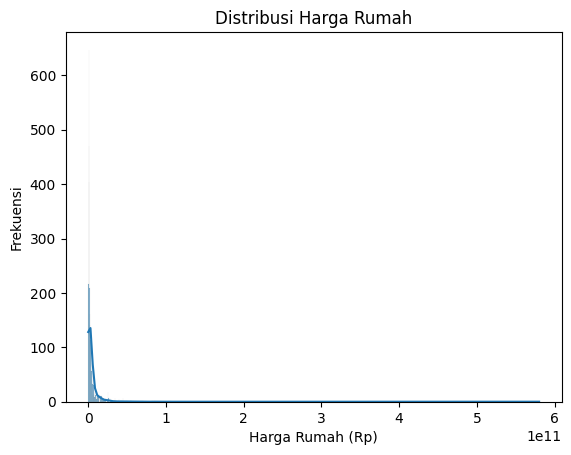

In [145]:
#visualisai distribusi harga rumah
sns.histplot(data['price_in_rp'], kde=True)
plt.title('Distribusi Harga Rumah')
plt.xlabel('Harga Rumah (Rp)')
plt.ylabel('Frekuensi')
plt.show()

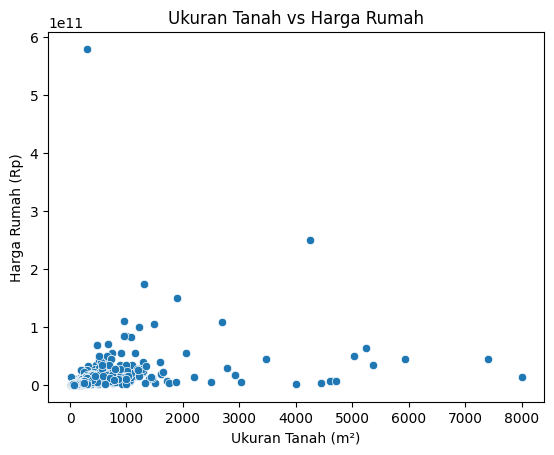

In [146]:
#hubungan antara ukuran tanah dan harga rumah
sns.scatterplot(x=data['land_size_m2'], y=data['price_in_rp'])
plt.title('Ukuran Tanah vs Harga Rumah')
plt.xlabel('Ukuran Tanah (m²)')
plt.ylabel('Harga Rumah (Rp)')
plt.show()

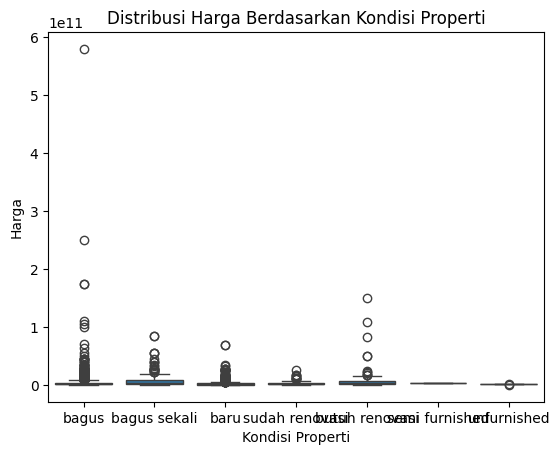

In [147]:
sns.boxplot(x=data['property_condition'], y=data['price_in_rp'])
plt.title('Distribusi Harga Berdasarkan Kondisi Properti')
plt.xlabel('Kondisi Properti')
plt.ylabel('Harga')
plt.show()

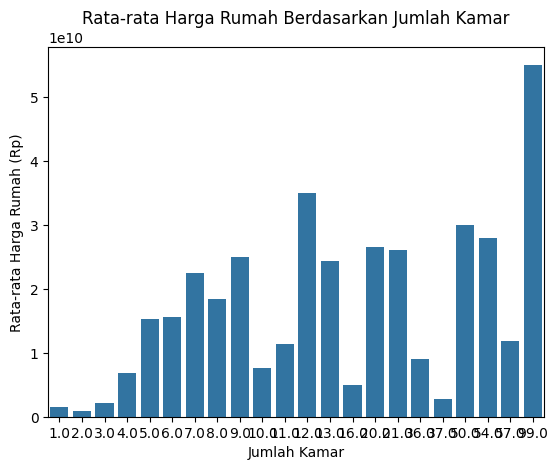

In [148]:
# Menghitung rata-rata harga berdasarkan jumlah kamar
avg_price_by_bedrooms = data.groupby('bedrooms')['price_in_rp'].mean().reset_index()

# Membuat bar plot
sns.barplot(x='bedrooms', y='price_in_rp', data=avg_price_by_bedrooms)
plt.title('Rata-rata Harga Rumah Berdasarkan Jumlah Kamar')
plt.xlabel('Jumlah Kamar')
plt.ylabel('Rata-rata Harga Rumah (Rp)')
plt.show()

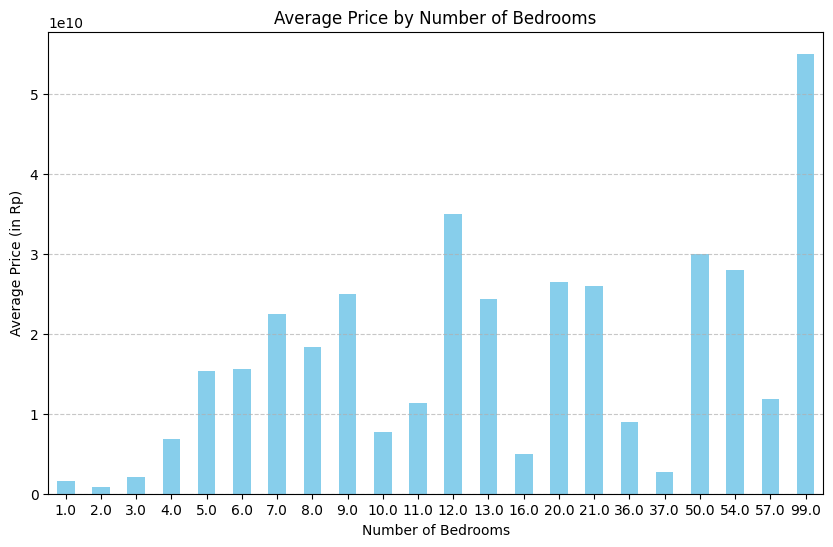

In [149]:
# Menghitung rata-rata harga untuk setiap jumlah kamar tidur
average_price_bedrooms = data.groupby('bedrooms')['price_in_rp'].mean()

# Membuat diagram batang
plt.figure(figsize=(10, 6))
average_price_bedrooms.plot(kind='bar', color='skyblue')
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price (in Rp)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# ***Model Prediksi Rumah***

In [159]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# One-hot encoding hanya untuk kolom yang dipilih
data = pd.get_dummies(data, drop_first=True)

#memilih fitur dan target
X = data.drop(columns=['price_in_rp']) #fitur ranpa kolom harga
y = data['price_in_rp'].values #data target

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (2647, 2856)
Testing data shape: (662, 2856)


In [160]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Inisialisasi model Random Forest
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Melatih model dengan data training
rf_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = rf_model.predict(X_test)

In [161]:
# Hitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")# Hitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 1335256580.81571
Mean Squared Error (MSE): 6.7406000796922356e+19
Root Mean Squared Error (RMSE): 8210115760.26321
R² Score: 0.5213577178990048
Mean Absolute Error (MAE): 1335256580.81571
Mean Squared Error (MSE): 6.7406000796922356e+19
Root Mean Squared Error (RMSE): 8210115760.26321
R² Score: 0.5213577178990048


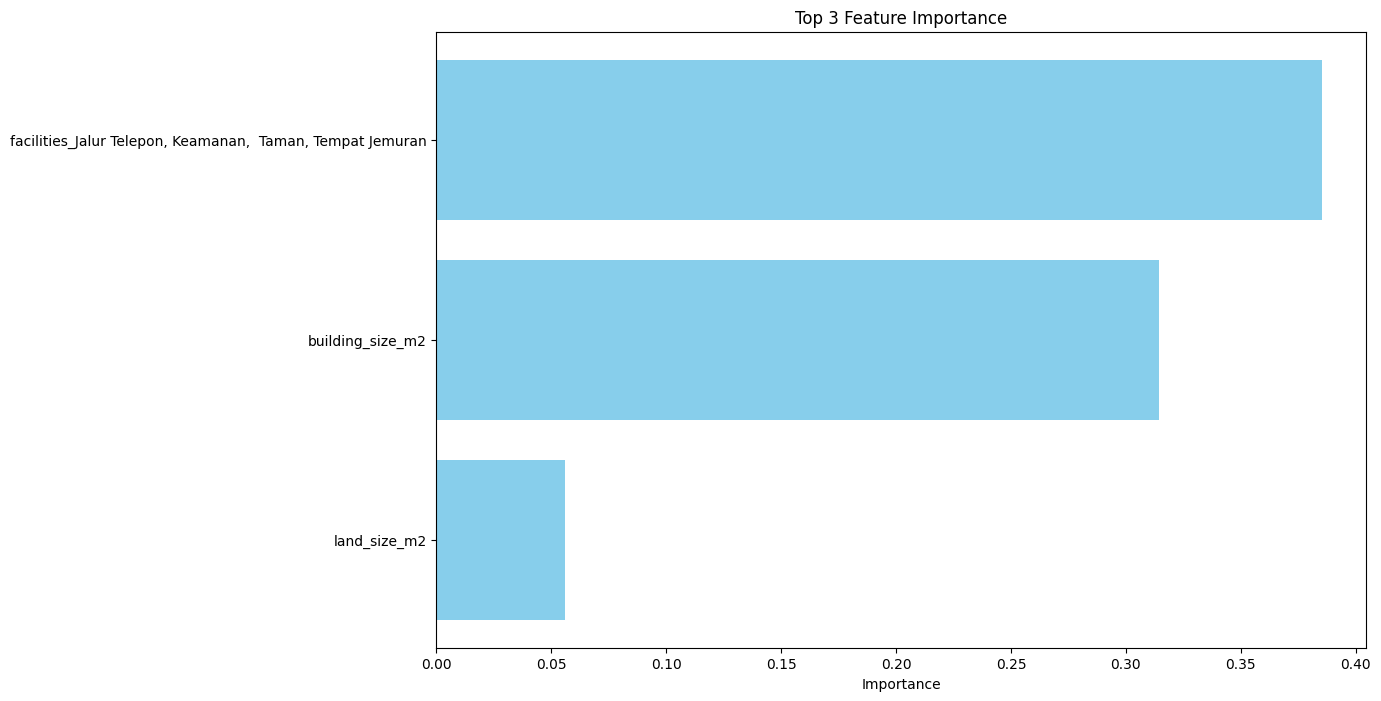

In [162]:
#mengambil fitur penting
importances = rf_model.feature_importances_

# Membuat DataFrame untuk visualisasi
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Menampilkan hanya 20 fitur terpenting
top_n = 3
top_features = importance_df.sort_values(by='Importance', ascending=False).head(top_n)

# Visualisasi
plt.figure(figsize=(12, 8))  # Memperbesar ukuran gambar
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.title('Top 3 Feature Importance')
plt.xlabel('Importance')
plt.gca().invert_yaxis()  # Membalik sumbu Y agar fitur terpenting di atas
plt.show()


In [163]:
# Membuat DataFrame untuk membandingkan hasil
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.head()


,Actual,Predicted
0,3.000000e+09,6.084600e+09
1,9.450000e+08,9.325000e+08
2,8.950000e+08,1.015940e+09
3,2.500000e+09,2.943100e+09
4,1.650000e+09,2.919300e+09


In [165]:
# Mengekspor ke file CSV
results.to_csv('hasil_prediksi_rumah.csv', index=False)

print("Hasil prediksi telah diekspor ke 'hasil_prediksi.csv'")

Hasil prediksi telah diekspor ke 'hasil_prediksi.csv'
